### Importing Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# importing ml models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

### Importing Data 

In [2]:
#Loading the Dataset

df=pd.read_csv("diabetes.csv")

In [3]:
#Exploring Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Basic Statistics for Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Cleaning

In [6]:
#Checking for Null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***No Null Values***

In [7]:
#checking for duplicates
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


***No Duplicated Values***

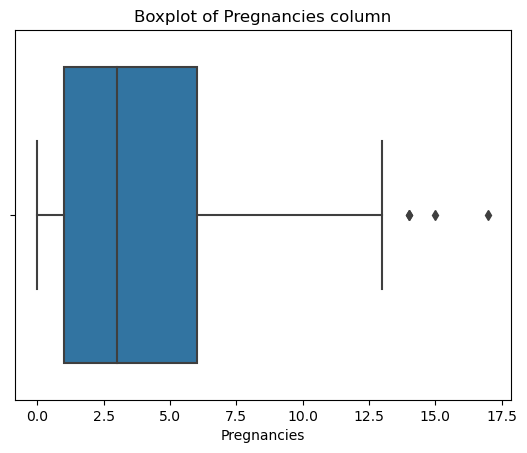

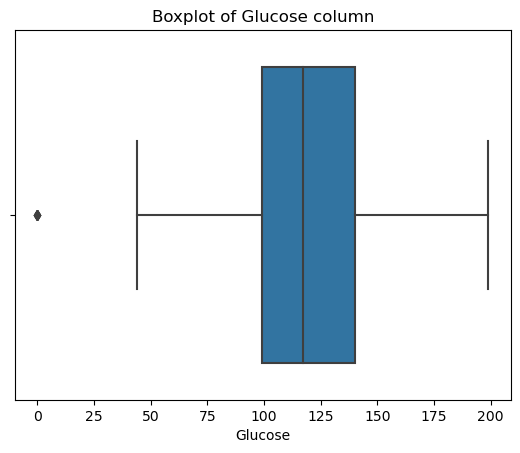

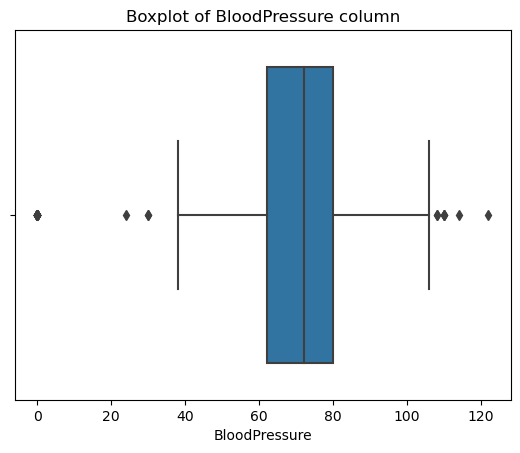

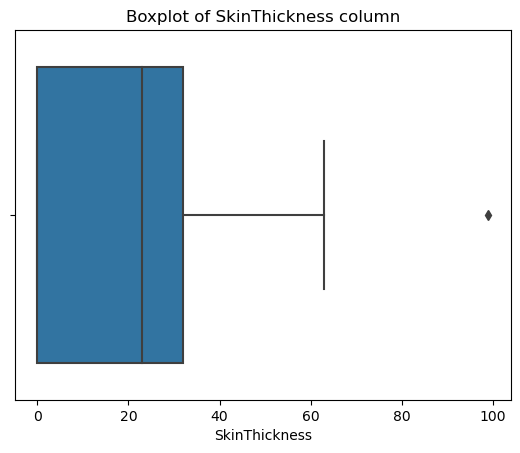

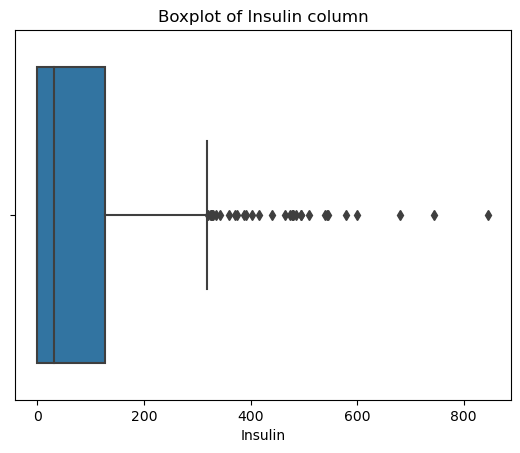

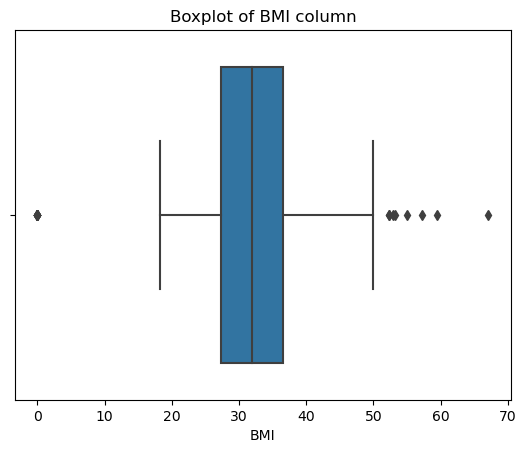

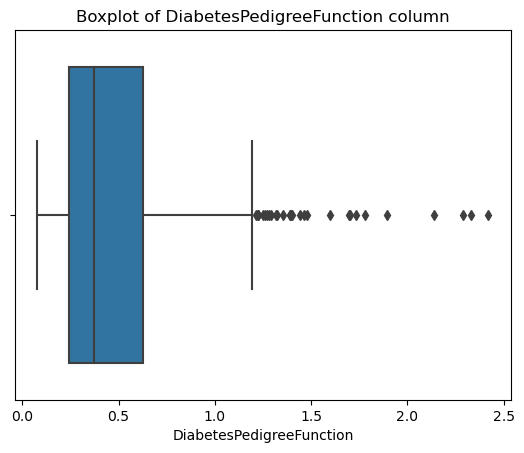

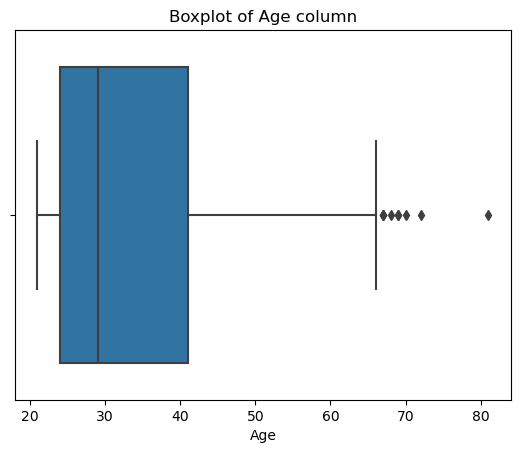

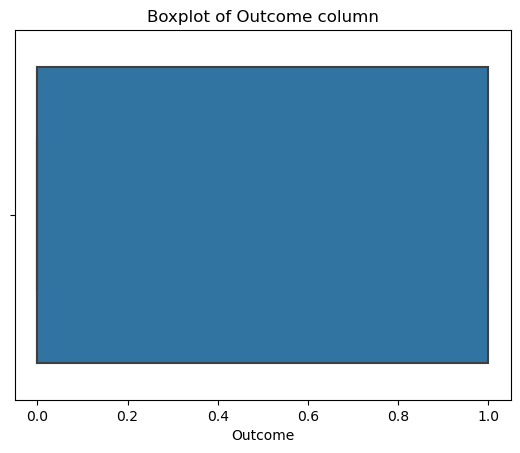

In [8]:
#Using Boxplot to check for Outliers
for col in df.columns:
    sns.boxplot(x=col,data=df)
    plt.title("Boxplot of {} column".format(col))
    plt.show()

**Interpretation of Outliers.**
- In boxplot of pregnancy the plot is showing outliers for 13,15 and 17 pregnancies but I will not remove them from data as it is possible for a women to bear 17 childs.
- In boxplot of glucose column, the outlier is shown at 0 which is not possible a women cannot have a zero glucose level.So, I will remove it.
- In boxplot of blood pressure column, outliers below lower quartiles require removal but upper don't.
- The outlier in skin thickness column is too far from the upper quartile so I will prefer to remove it.
- In boxplot of insulin, insulin level are quite fluctuating so I will not consider them as outliers
- In boxplot of BMI, a BMI of 0 cannot exist so I will remove it
- In boxplot of diabetes pedigree function, scores can vary based on family history. So, I will not remove them.
- The boxplot of age column also depicts some outliers but people with such ages can exist, so, I will not remove them.
**Other missing data**
- In skin thickness and insulin boxplot, the plot is starting from zero which is weird because a human even a pregnant female cannot have zero skin thickness and insulin level. So, I will replace the values equal to zero in these columns with the median of the column values

In [9]:
# Getting zero and less than zero values counts in each column
for col in df.columns:
    zero_values = len(df[df[col] <= 0])
    print("Number of zero or less tha zero values in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values in column Pregnancies are 111
Number of zero or less tha zero values in column Glucose are 5
Number of zero or less tha zero values in column BloodPressure are 35
Number of zero or less tha zero values in column SkinThickness are 227
Number of zero or less tha zero values in column Insulin are 374
Number of zero or less tha zero values in column BMI are 11
Number of zero or less tha zero values in column DiabetesPedigreeFunction are 0
Number of zero or less tha zero values in column Age are 0
Number of zero or less tha zero values in column Outcome are 500


In [10]:
# printing shape of dataframe before cleaning
print("Dataset shape before cleaning {}".format(df.shape))

Dataset shape before cleaning (768, 9)


In [11]:
# imputing the zero values and less than zero values in the following columns with the median of the columns
col_containing_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in col_containing_zero:
    median = df[col].median()
    df.loc[df[col]<=0,col] = median

In [12]:
# Now checking again for zero value counts in the columns
for col in df.columns:
    zero_values = len(df[df[col] == 0])
    print("Number of zero or less tha zero values after cleaning in column {} are {}".format(col,zero_values))

Number of zero or less tha zero values after cleaning in column Pregnancies are 111
Number of zero or less tha zero values after cleaning in column Glucose are 0
Number of zero or less tha zero values after cleaning in column BloodPressure are 0
Number of zero or less tha zero values after cleaning in column SkinThickness are 0
Number of zero or less tha zero values after cleaning in column Insulin are 0
Number of zero or less tha zero values after cleaning in column BMI are 0
Number of zero or less tha zero values after cleaning in column DiabetesPedigreeFunction are 0
Number of zero or less tha zero values after cleaning in column Age are 0
Number of zero or less tha zero values after cleaning in column Outcome are 500


**Now, after replacing zero values and values less than zero in the column with the median value of the column, zero values are present only in the pregnancies and outcome column.**

In [13]:
# printing shape of dataframe after cleaning
print("Dataset shape after cleaning {}".format(df.shape))

Dataset shape after cleaning (768, 9)


### Exploratory Data Analysis(EDA)

#### Univariate Analysis 

#### Analysis of categorical columns

In [14]:
# Counting the unique values of the target column
diabetes_count = df["Outcome"].value_counts()
print("Patients without diabetes {}".format(diabetes_count[0]))
print("-" * 30)
print("Patients with diabetes {}".format(diabetes_count[1]))

Patients without diabetes 500
------------------------------
Patients with diabetes 268


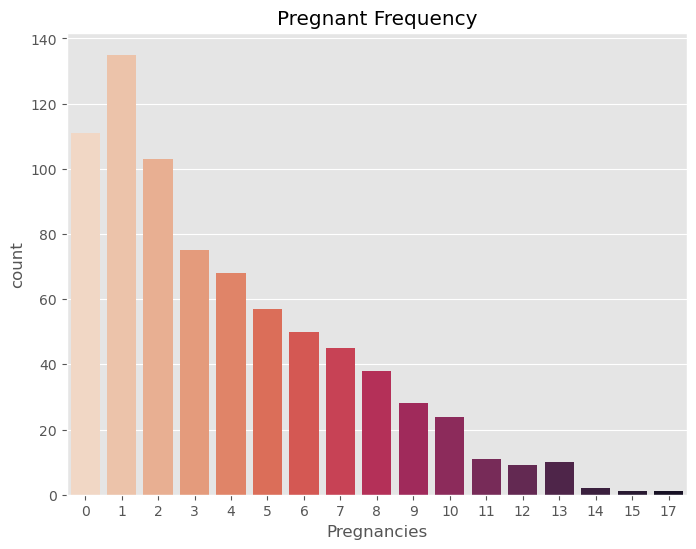

In [15]:
# pregnancies frequency
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.countplot(x="Pregnancies",data=df,palette="rocket_r")
plt.title("Pregnant Frequency")
plt.show()
#pregnant_count = df["pregnancies"].value_counts()

 **Analysis of numerical columns**

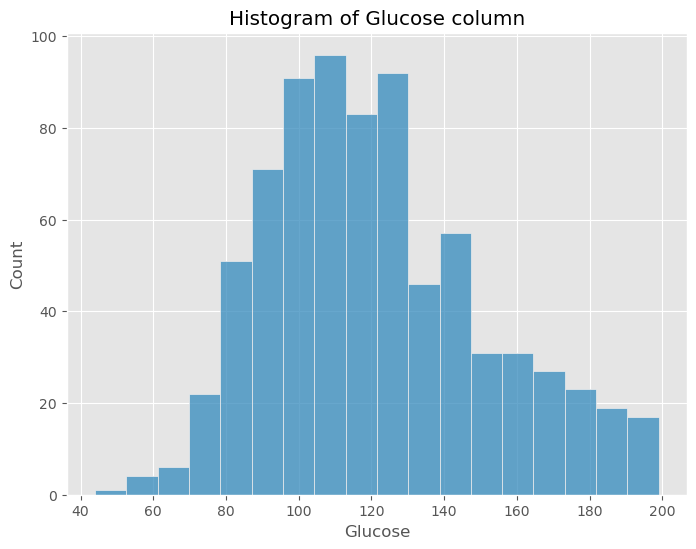

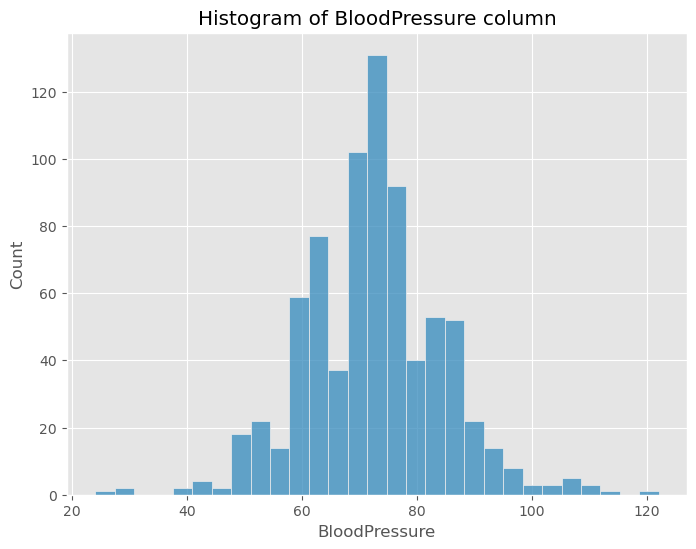

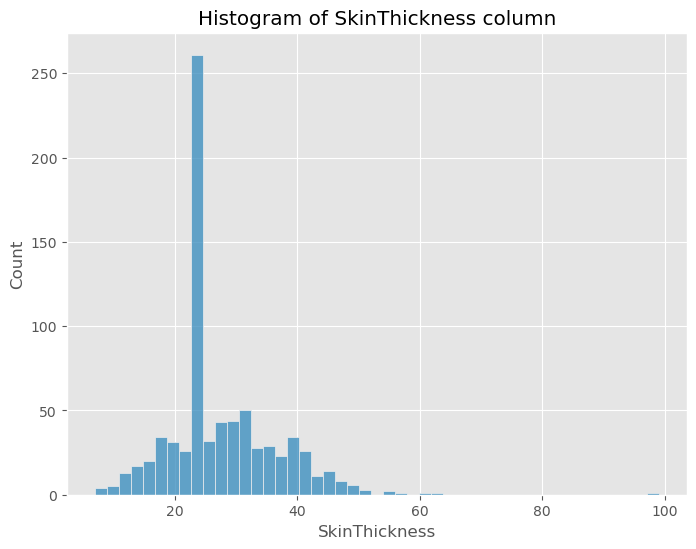

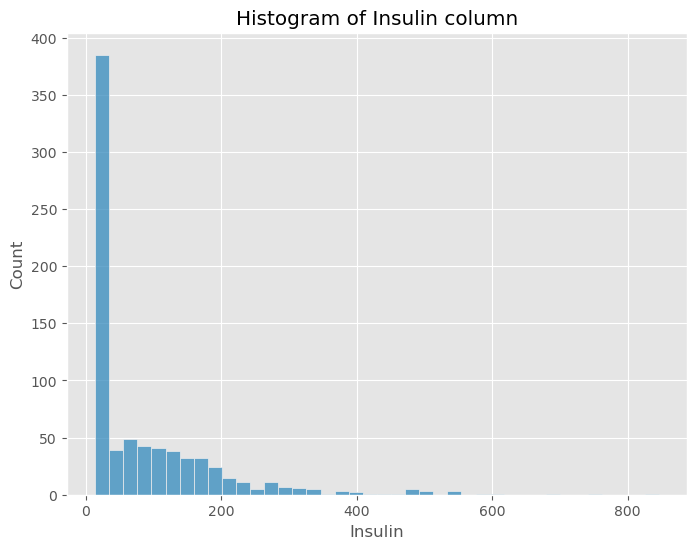

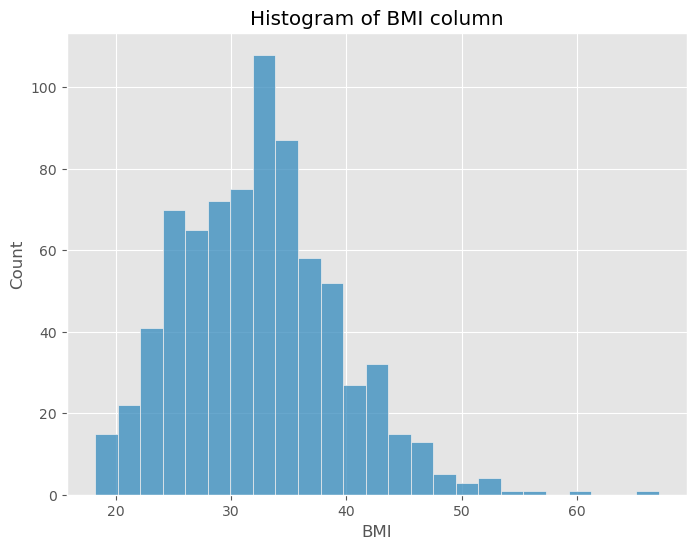

KeyError: 'DiabetespedigreeFunction'

<Figure size 800x600 with 0 Axes>

In [16]:
# making histograms of the following columns to see their distribution
num_col = ['Glucose',"BloodPressure","SkinThickness","Insulin","BMI","DiabetespedigreeFunction","Age"]
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col])
    plt.title("Histogram of {} column".format(col))
    plt.show()

**Interpretation of histograms**
- Some columns are normally distrubted and some columns are right skewed
- Column distributions that are normally or roughly normally distributed are glucose, blood pressure, skin thickness and bmi.
- Column distributions that are rightly skewed are insulin, diabetes_ped_func and age.
- To make all the variables normal we can apply normalization technique.

**Bivariate Analysis related to target column**

**Age and Outcome**

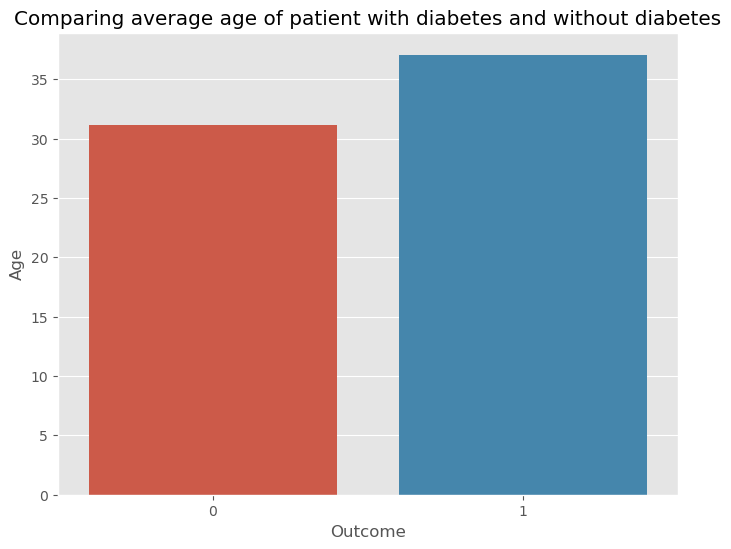

In [17]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Age",data=df,ci= False)
plt.title("Comparing average age of patient with diabetes and without diabetes")
plt.show()

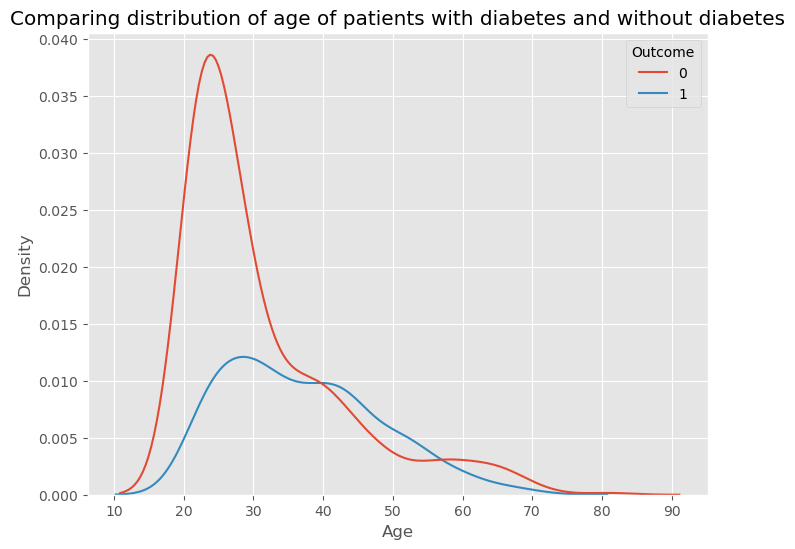

In [18]:
# plotting kernel density estimation of age distribution of diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="Age",hue="Outcome",data=df)
plt.title("Comparing distribution of age of patients with diabetes and without diabetes")
plt.show()

There seem to be a difference in the age of patient with diabetes and without diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.

**Applying student's t-test to determine if there is significant difference in the average age of people with diabetes and without diabetes.**
- H0 : There is no difference in the average age of patients with diabetes and without diabetes
- H1: There is difference in the average age of patients with diabetes and without diabetes

In [19]:
# applying t-test to determine is their significant difference in age distribution of diabetic and non diabetic patients
age_with_diabetes = df[df["Outcome"] == 1]["Age"]
age_without_diabetes = df[df["Outcome"] == 0]["Age"]

# applying t-test
stat,p = ttest_ind(age_with_diabetes,age_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average age of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average age of patients with diabetes and without diabetes ")

P-value 2.2099754606654358e-11
We can reject the null hypothesis.There is  difference in the average age of patients with diabetes and without diabetes 


**Diabetes Pedigree Function and Outcome**

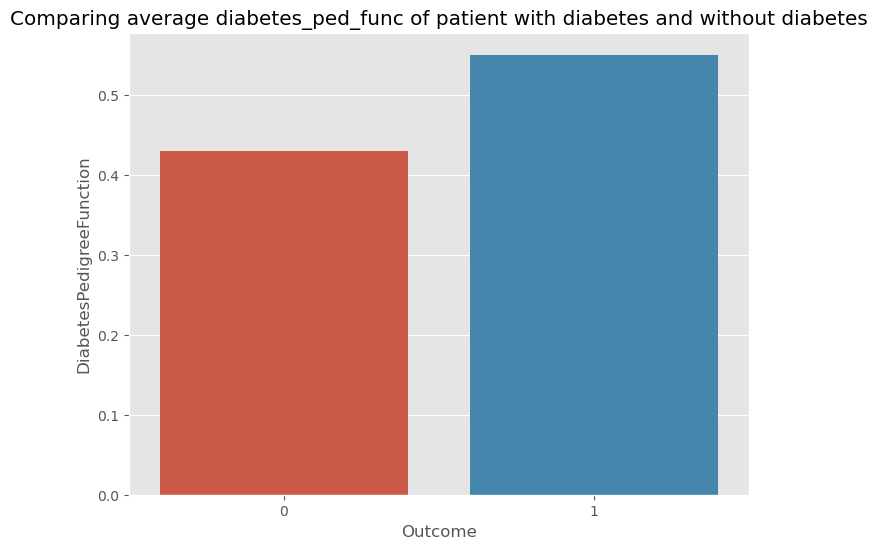

In [20]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="DiabetesPedigreeFunction",data=df,ci= False)
plt.title("Comparing average diabetes_ped_func of patient with diabetes and without diabetes")
plt.show()

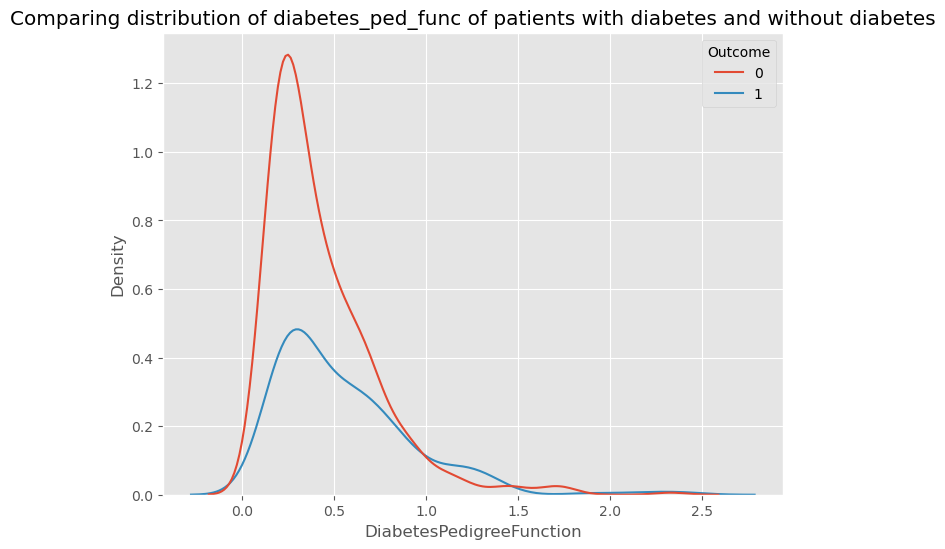

In [21]:
# plotting kernel density estimation of diabtes pedigree distribution of diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="DiabetesPedigreeFunction",hue="Outcome",data=df)
plt.title("Comparing distribution of diabetes_ped_func of patients with diabetes and without diabetes")
plt.show()


**There seem to be a difference in the diabetes pedigree function of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average diabetes pedigree function of people with diabetes and without diabetes.**
- H0 : There is no difference in the average diabetes pedigree function of patients with diabetes and without diabetes
- H1: There is difference in the average diabetes pedigree function of patients with diabetes and without diabetes

In [22]:
# Applying the t-test to check if the diabetes pedgree function has different distribution for diabetic and non-diabetic patients
ped_func_with_diabetes = df[df["Outcome"] == 1]["DiabetesPedigreeFunction"]
ped_func_without_diabetes = df[df["Outcome"] == 0]["DiabetesPedigreeFunction"]


stat,p = ttest_ind(ped_func_with_diabetes,ped_func_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average diabetes pedigree function of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average diabetes pedigree function of patients with diabetes and without diabetes ")

P-value 1.254607010148809e-06
We can reject the null hypothesis.There is  difference in the average diabetes pedigree function of patients with diabetes and without diabetes 


**BMI and Outcome**

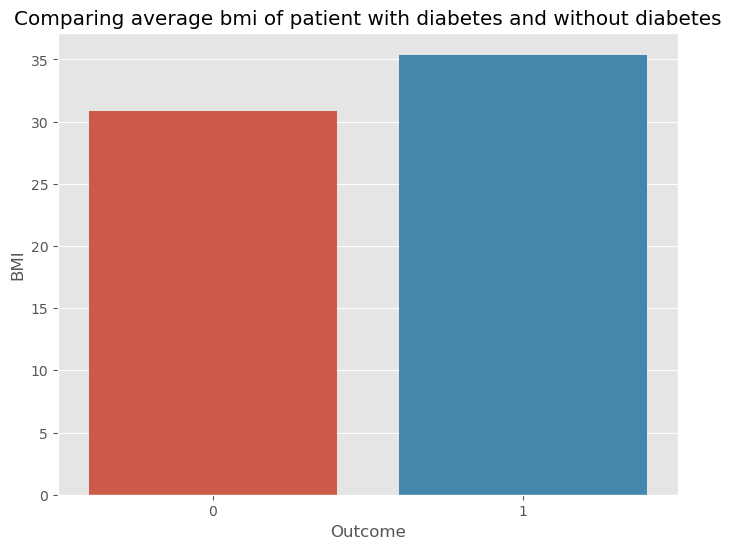

In [23]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="BMI",data=df,ci= False)
plt.title("Comparing average bmi of patient with diabetes and without diabetes")
plt.show()

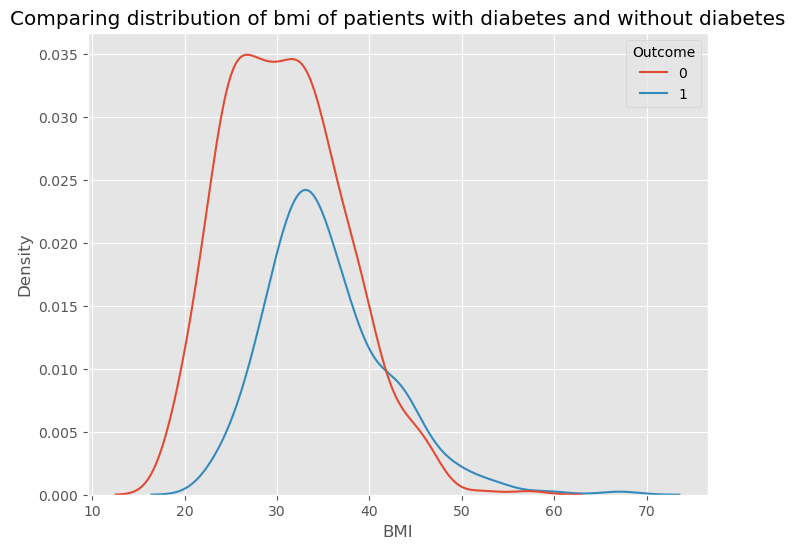

In [24]:
# plotting kernel density estimation plot for bmi with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="BMI",hue="Outcome",data=df)
plt.title("Comparing distribution of bmi of patients with diabetes and without diabetes")
plt.show()

**There seem to be a difference in the bmi of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average bmi of patients with diabetes and without diabetes.**
- H0 : There is no difference in the average bmi of patients with diabetes and without diabetes
- H1: There is difference in the average bmi of patients with diabetes and without diabetes

In [25]:
# Applying the t-test to check if the average bmi is different for diabetic and non-diabetic patients

from scipy.stats import ttest_ind
bmi_with_diabetes = df[df["Outcome"] == 1]["BMI"]
bmi_without_diabetes = df[df["Outcome"] == 0]["BMI"]


stat,p = ttest_ind(ped_func_with_diabetes,ped_func_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average bmi of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average bmi of patients with diabetes and without diabetes ")

P-value 1.254607010148809e-06
We can reject the null hypothesis.There is  difference in the average bmi of patients with diabetes and without diabetes 


**Insulin and Outcome**

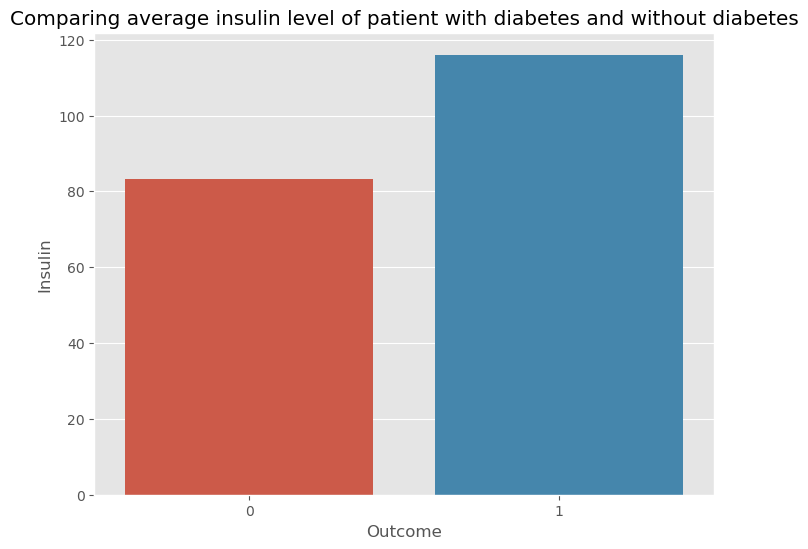

In [26]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Insulin",data=df,ci= False)
plt.title("Comparing average insulin level of patient with diabetes and without diabetes")
plt.show()

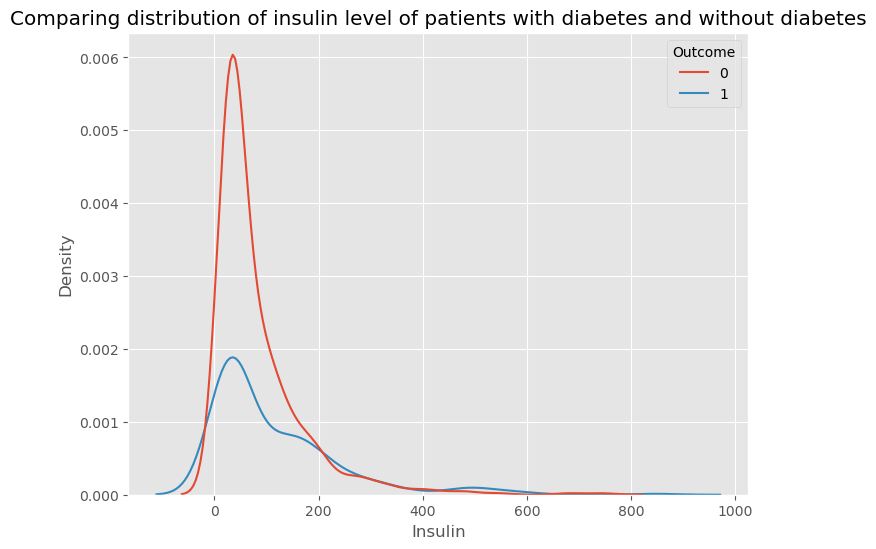

In [27]:
# plotting kernel density estimation plot for insulin with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="Insulin",hue="Outcome",data=df)
plt.title("Comparing distribution of insulin level of patients with diabetes and without diabetes")
plt.show()

**There seem to be a difference in the average insulin level of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average insulin level of patients with diabetes and without diabetes.**
- H0 : There is no difference in the average insulin level of patients with diabetes and without diabetes
- H1: There is difference in the average insulin level of patients with diabetes and without diabetes


In [28]:
# Applying the t-test to check if the average insulin is different for diabetic and non-diabetic patients
insulin_with_diabetes = df[df["Outcome"] == 1]["Insulin"]
insulin_without_diabetes = df[df["Outcome"] == 0]["Insulin"]


stat,p = ttest_ind(insulin_with_diabetes,insulin_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average insulin level of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average insulin level of patients with diabetes and without diabetes ")

P-value 3.621722161782352e-05
We can reject the null hypothesis.There is  difference in the average insulin level of patients with diabetes and without diabetes 


**Skin Thickness and Outcome**

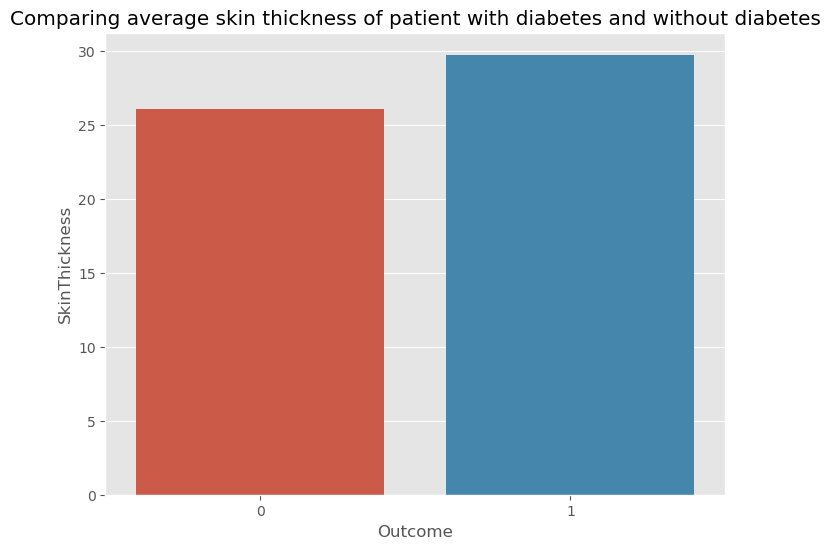

In [29]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="SkinThickness",data=df,ci= False)
plt.title("Comparing average skin thickness of patient with diabetes and without diabetes")
plt.show()

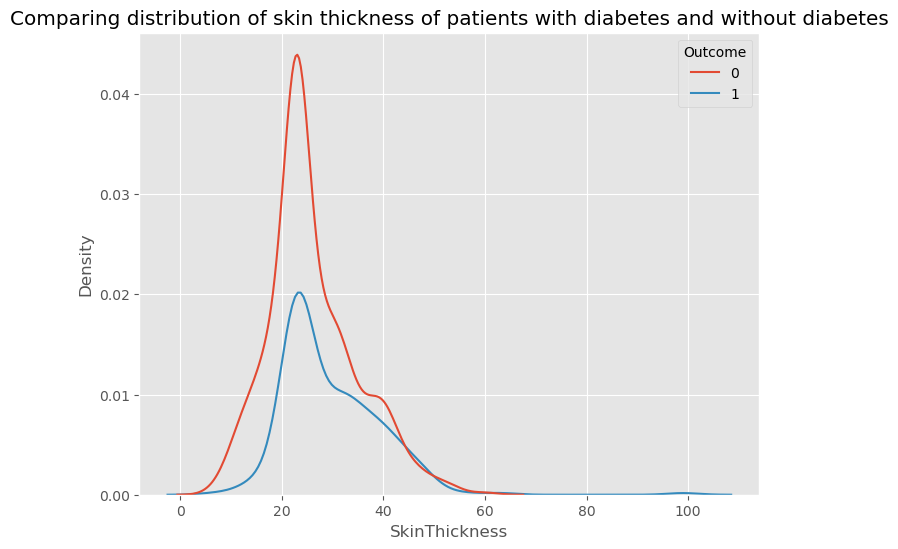

In [30]:
# plotting kernel density estimation plot for skin thickness with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="SkinThickness",hue="Outcome",data=df)
plt.title("Comparing distribution of skin thickness of patients with diabetes and without diabetes")
plt.show()

**There seem to be a difference in the average skin thickness of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average skin thickness of patients with diabetes and without diabetes.**
- H0 : There is no difference in the average skin thickness of patients with diabetes and without diabetes
- H1: There is difference in the average skin thickness of patients with diabetes and without diabetes

In [31]:
# Applying the t-test to check if the average skin thickness is different for diabetic and non-diabetic patients
skin_thick_with_diabetes = df[df["Outcome"] == 1]["SkinThickness"]
skin_thick_without_diabetes = df[df["Outcome"] == 0]["SkinThickness"]


stat,p = ttest_ind(skin_thick_with_diabetes,skin_thick_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average skin_thickness of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average skin_thickness of patients with diabetes and without diabetes ")

P-value 1.3011814339570038e-07
We can reject the null hypothesis.There is  difference in the average skin_thickness of patients with diabetes and without diabetes 


**Blood Pressure and Outcome**

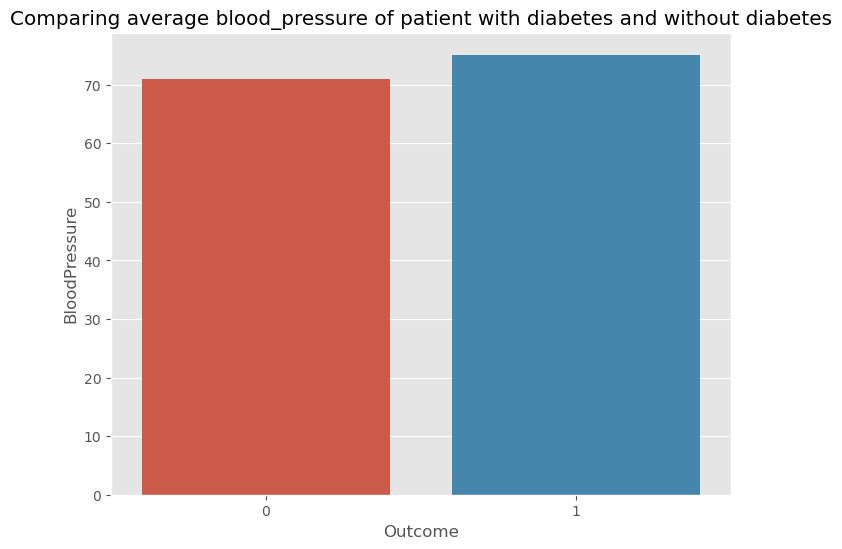

In [32]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="BloodPressure",data=df,ci= False)
plt.title("Comparing average blood_pressure of patient with diabetes and without diabetes")
plt.show()

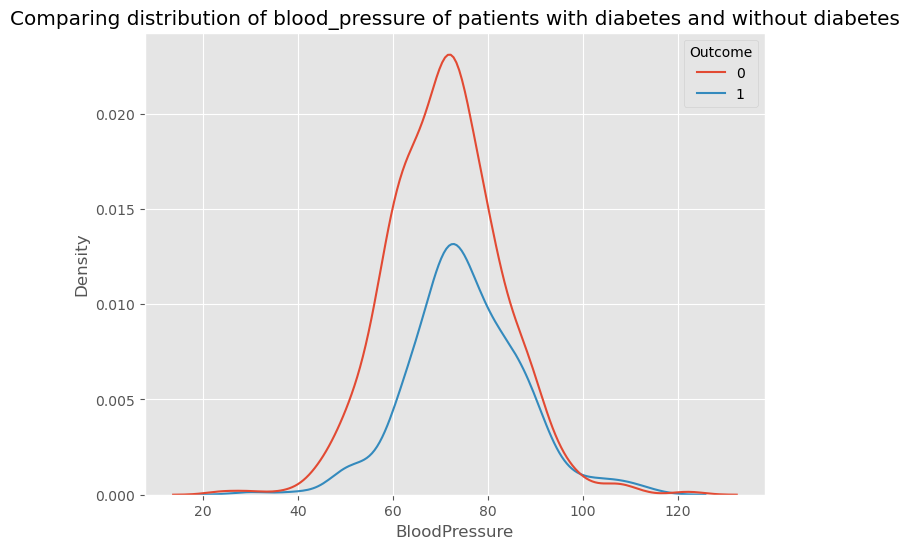

In [33]:
# plotting kernel density estimation plot for blood pressure with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="BloodPressure",hue="Outcome",data=df)
plt.title("Comparing distribution of blood_pressure of patients with diabetes and without diabetes")
plt.show()

**There seem to be a difference in the average blood pressure of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average blood pressure of patients with diabetes and without diabetes.**
- H0 : There is no difference in the average blood pressure of patients with diabetes and without diabetes
- H1: There is difference in the average blood pressure of patients with diabetes and without diabetes

In [34]:
# Applying the t-test to check if the average blood pressure is different for diabetic and non-diabetic patients
blood_pressure_with_diabetes = df[df["Outcome"] == 1]["BloodPressure"]
blood_pressure_without_diabetes = df[df["Outcome"] == 0]["BloodPressure"]


stat,p = ttest_ind(blood_pressure_with_diabetes,blood_pressure_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average blood_pressure of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average blood_pressure of patients with diabetes and without diabetes ")


P-value 3.8908354906479115e-06
We can reject the null hypothesis.There is  difference in the average blood_pressure of patients with diabetes and without diabetes 


**Glucose level and Outcome**

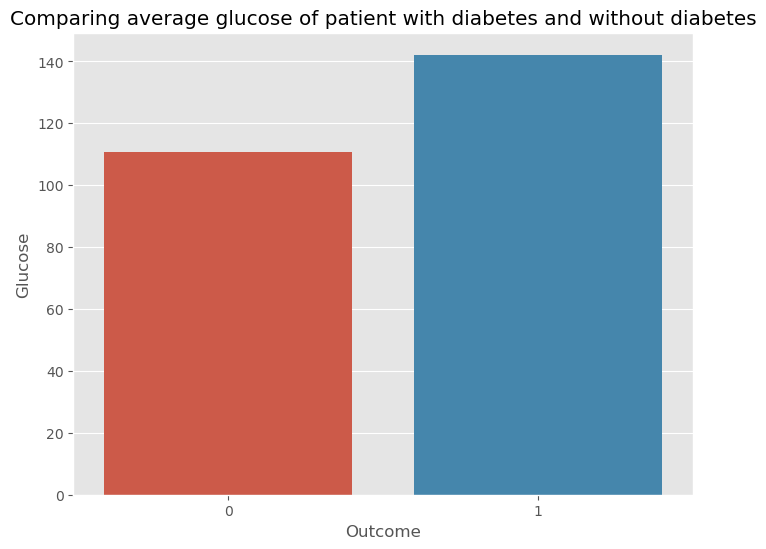

In [35]:
# seaborn bar plot gives the variable mean
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Glucose",data=df,ci= False)
plt.title("Comparing average glucose of patient with diabetes and without diabetes")
plt.show()

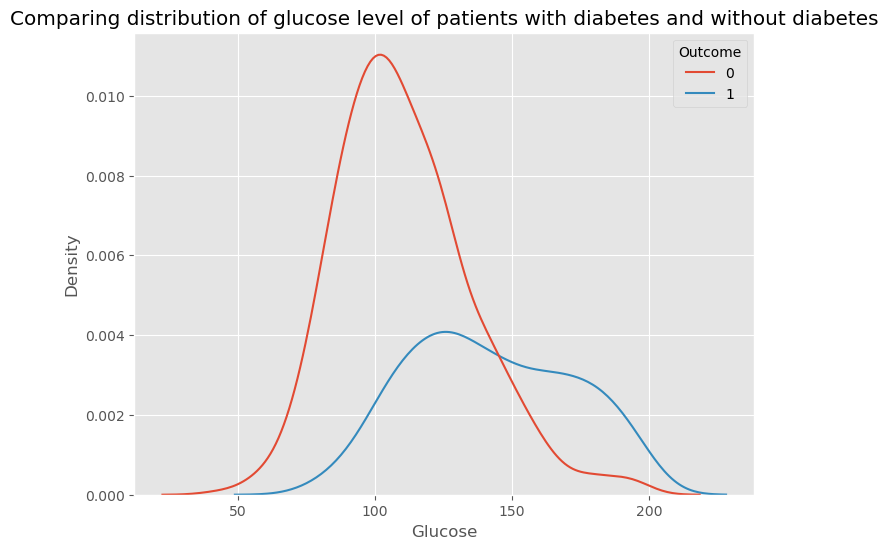

In [36]:
# plotting kernel density estimation plot for glucose with respect to diabetic and non-diabetic patients
plt.figure(figsize=(8,6))
sns.kdeplot(x="Glucose",hue="Outcome",data=df)
plt.title("Comparing distribution of glucose level of patients with diabetes and without diabetes")
plt.show()

**There seem to be a difference in the average glucose level of patient with diabetes and withut diabetes. But, we can apply statistical testing to confirm if the difference is significant or not.**

**Applying student's t-test to determine if there is significant difference in the average glucose level of patients with diabetes and without diabetes.**
- H0 : There is no difference in the average glucose level of patients with diabetes and without diabetes
- H1: There is difference in the average glucose level of patients with diabetes and without diabetes

In [37]:
# Applying the t-test to check if the average glucose level is different for diabetic and non-diabetic patients
glucose_with_diabetes = df[df["Outcome"] == 1]["Glucose"]
glucose_without_diabetes = df[df["Outcome"] == 0]["Glucose"]


stat,p = ttest_ind(glucose_with_diabetes,glucose_without_diabetes)
if p > 0.05:
    print("P-value {}".format(p))
    print("We cannot reject the null hypothesis.There is no difference in the average glucose of patients with diabetes and without diabetes ")
else:
    print("P-value {}".format(p))
    print("We can reject the null hypothesis.There is  difference in the average glucose of patients with diabetes and without diabetes ")

P-value 3.1287190418423694e-48
We can reject the null hypothesis.There is  difference in the average glucose of patients with diabetes and without diabetes 


**Conclusion**

- From the graphs of each variable, bar graph and kde I suspected difference in mean of a variable for diabetic and non-diabetic patiens. I applied t-test to determine if the difference suggested by the graph is real or not.
- I conclude that the patient who suffer from diabetes have following characteristics than those who do not suffer.
 - They are older
 - They have high glucose level
 - They have high blood pressure
 - They have high bmi
 - They have high diabetes pedigree function

- For the skin thickness and insulin I cannot say for sure because they contain large number of zero values and I imputed the zero values in them with their means. So, it can result in wrong conclusions.

**Multivariate analysis**

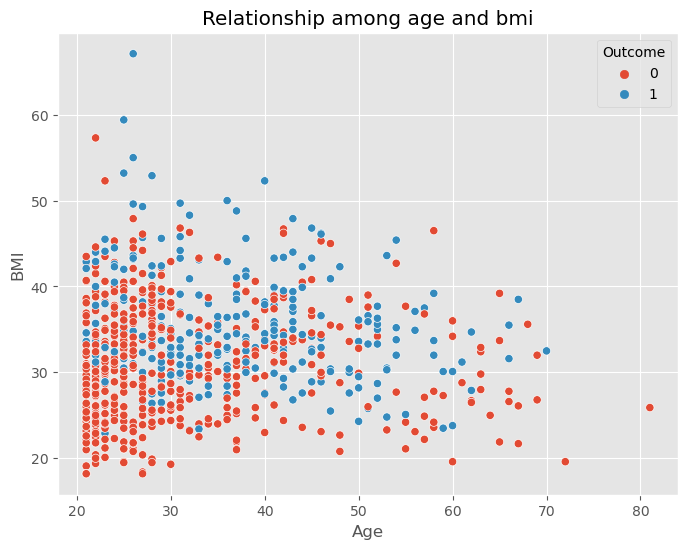

In [38]:
# making a scatterplot of age vs bmi to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="BMI",data=df,hue="Outcome")
plt.title('Relationship among age and bmi')
plt.show()

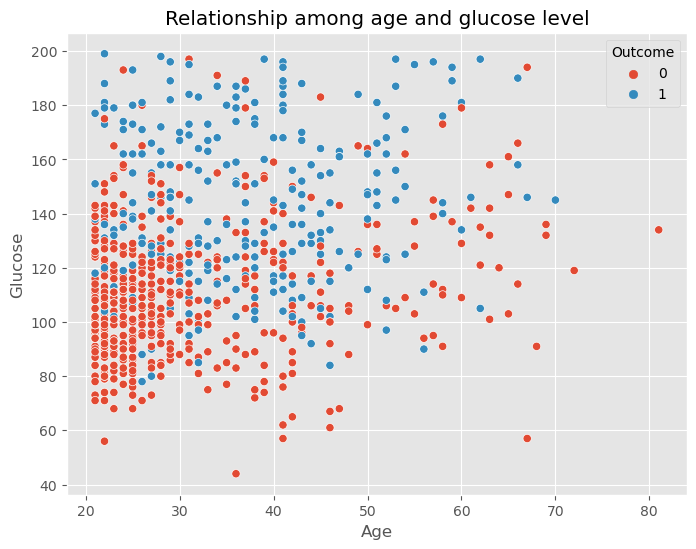

In [39]:
# making a scatterplot of age vs glucose level to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Glucose",data=df,hue="Outcome")
plt.title('Relationship among age and glucose level')
plt.show()

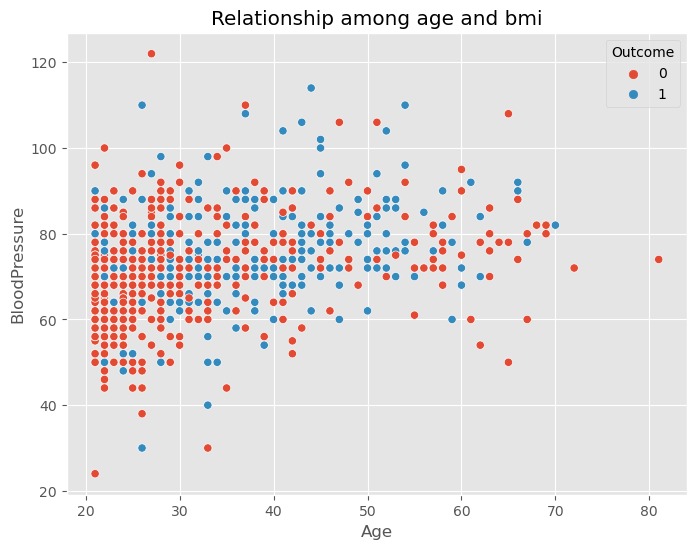

In [40]:
# making a scatterplot of age vs blood pressure to detect if a relationship exist
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="BloodPressure",data=df,hue="Outcome")
plt.title('Relationship among age and bmi')
plt.show()

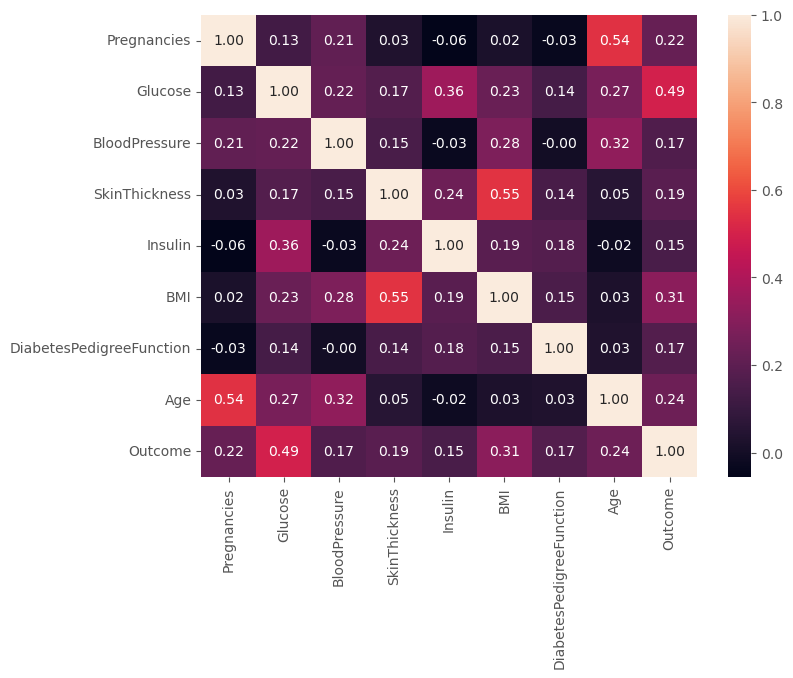

In [41]:
#Correlation
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

- From the heatmap we can see, being diabetic is correlated with the glucose level, bmi and age.